# TP 1 - Équation de la chaleur
## Schéma explicite

On résout numériquement l'équation de la chaleur sur $\Omega:=]-L,L[$ avec conditions aux limites de Dirichlet

$$ \frac{\partial u}{\partial t}(x,t)-\frac{\partial^2 u}{\partial x^2}(x,t) = 0,\quad x \in \Omega,\quad t \gt 0,\\
u(-L,t)=u(L,t)=0,\quad t > 0,\\
u(x,0)=u_0(x),\quad x \in \Omega, $$

et schéma explicite :

$$ \frac{u_j^{n+1}-u_j^n}{\Delta t}-\frac{u_{j+1}^n-2u_j^n+u_{j-1}^n}{\Delta x^2} = 0. $$ 

## Première partie : 
- S'approprier le code
- Tester les choses faciles (changer nbr de points, ...)
 
- Etude de consistence
    - Donner un pas de temps très petit
    - Et reduire le pas en espace au fur et à mesure (print l'erreur)

- Etude de précision en $x$
    1) Faire tourner le code pour **différentes valeurs** de $\Delta x$ décroissante en divisant par 2 à chaque fois

    2) Fixer $\Delta t = 0.0000001$ (très petit), Faire tourner le code pour $\Delta x = 0.2, 0.1, 0.05, 0.025$, en augmentant $N_x$ pour avoir un $\Delta x$ plus petit

    3) Enregistrer l'erreur obtenue et la stocker dans $errx = [ ... ]$

    4) Tracer en échelle logarithmique

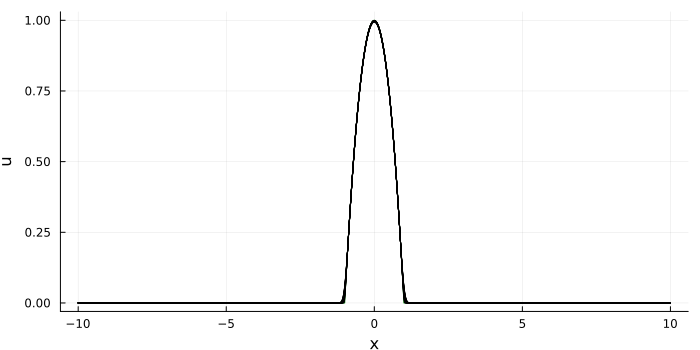

In [23]:
using LinearAlgebra, Plots

# Parameters
L = 10.0                               # domain half size - taille de l'intervalle valeur positives [-L,L]
Nx = 1600                              # grid size (space) - nombre de points de la grille
Δx = 2*L/Nx                            # step size (space)
σ = 0.1                                # CFL - alpha 
#Δt = σ * Δx^2                          # step size (time) 
Δt = 0.0000001
Nt = 200                               # grid size (time)
x = range(-L, L, length=Nx+1)          # grid (space) - linspace de -L à L
u0 = max.(0, 1 .- x.^2)                # initial condition - condition initiale

# Explicit scheme
u = u0 # Attention u_0 = une fonction évaluée aux points du maillage 
u_plot = plot(x, u, xlabel="x", ylabel="u", color=:green, legend=false)

B = Tridiagonal(σ*ones(Nx), 1 .- 2*σ*ones(Nx+1), σ*ones(Nx)) # matrice tridiagonale - ecrire la matrice du schema explicite

for n = 1:Nt    # boucle en temps
    u = B*u 
    if mod(n, Nt/20) == 0 # affichage tous les 20 pas de temps (moins long)
        plot!(u_plot, x, u, xlabel="x", ylabel="u", color=:black, legend=false)
    end
end
display(plot(u_plot, size=(700, 350))) # Phénomène de diffusion

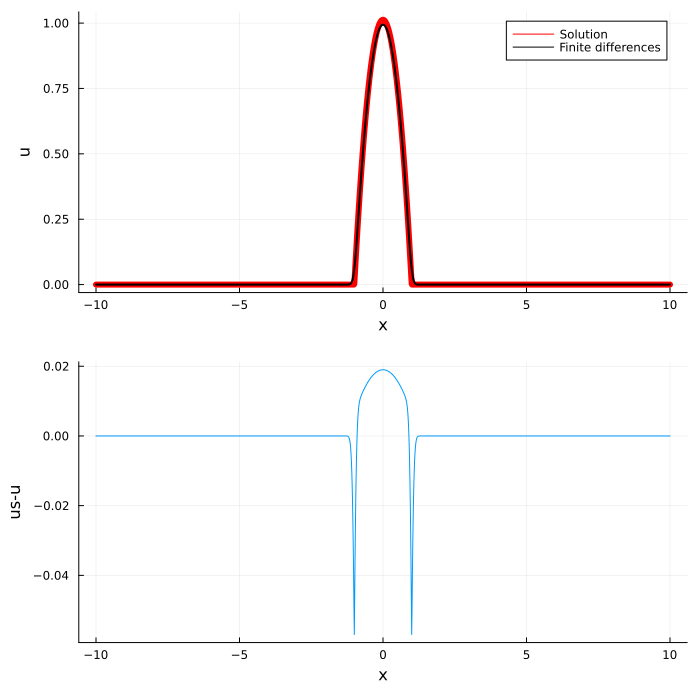

Δx: 0.0125	 Δt:1.0e-7	 max error: 0.05700103482349171


In [24]:
# Comparison with exact solution (computed convoluting with Gaussian kernel)
# Construction solution exacte - convolution avec une gaussienne
us = zeros(Nx+1)
ker = exp.( -((0:Nx)*Δx).^2 / (4*Nt*Δt) )
kmax = findall(x -> x < 1e-14, ker)
kmax = length(kmax) > 0 ? kmax[1] : error("Increase Nx")

for j = 1:(Nx+1)
    jmin = max(1, j-kmax)
    jmax = min(Nx+1, j+kmax)
    us[j] = Δx * sum( u0[jmin:jmax].*ker[1 .+ abs.(j.-(jmin:jmax))] ) / sqrt(4*π*Nt*Δt)
end

err = us-u
us_plot = plot(x, us, xlabel="x", ylabel="us", color=:red, label="Solution", lw=6)
plot!(us_plot, x, u, xlabel="x", ylabel="u", color=:black, label="Finite differences", lw=2)
err_plot = plot(x, err, xlabel="x", ylabel="us-u", legend=false)
display(plot(us_plot, err_plot, layout=(2, 1), size=(700, 700)))
println("Δx: ", Δx, "\t Δt:", Δt, "\t max error: ", maximum(abs.(err)))

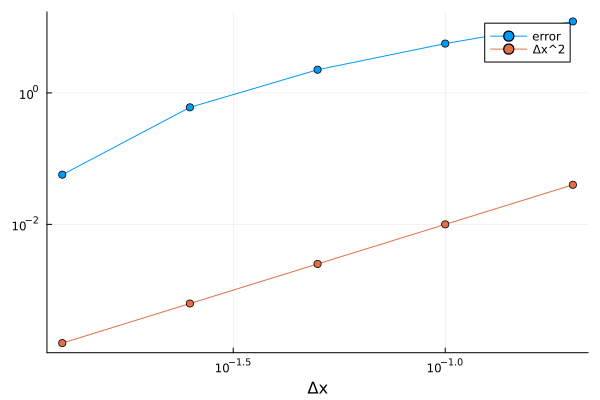

In [25]:
# Precision en espace test
Δx = [ 0.2, 0.1, 0.05, 0.025, 0.0125] # Ajouter des valeurs de Δx
errx = [ 12.22245197268432, 5.631858890978019, 2.253617544959731, 0.6032332453396727, 0.05700103482349171] 
plot(Δx, errx, xaxis=:log, yaxis=:log, marker=:dot, xlabel="Δx", label="error")
plot!(Δx, Δx.^2, xaxis=:log, yaxis=:log, marker=:dot, xlabel="Δx", label="Δx^2")
# On devrait (à la fin de l'exercice) avoir deux droites ascendantes de pentes similaire
# (plus $Δx$ augmente, plus l'erreur augmente) 

# Réponses

En fixant un $\Delta t$ égale à une très petite valeur, puis en diminuant $\Delta x$ au fur et à mesure, on obtient une erreur qui tend de plus en plus vers 0.  
Il s'agit donc d'une méthode de type **ordre 2**.

# Partie 2

# TP 1 - Équation de la chaleur
## Schéma explicite

On résout numériquement l'équation de la chaleur sur $\Omega:=]-L,L[$ avec conditions aux limites de Dirichlet

$$ \frac{\partial u}{\partial t}(x,t)-\frac{\partial^2 u}{\partial x^2}(x,t) = 0,\quad x \in \Omega,\quad t \gt 0,\\
u(-L,t)=u(L,t)=0,\quad t > 0,\\
u(x,0)=u_0(x),\quad x \in \Omega, $$

et $\theta$-schéma :

$$ \frac{u_j^{n+1}-u_j^n}{\Delta t}-\theta \frac{u_{j+1}^n-2u_j^n+u_{j-1}^n}{\Delta x^2} - (1 - \theta) \frac{u_{j+1}^{n+1}-2u_j^{n+1}+u_{j-1}^{n+1}}{\Delta x^2} = 0. $$ 

## Deuxième partie : 
- Ré-écrire le $\theta$-schéma sous forme matricielle
- Refaire la même chose que dans la première partie 



- Thêta schéma
    1) Ecrire le $\theta$-schéma sous forme matricielle : $AU^{n+1} = BU^n$

    2) Introduire le nouveau paramètre $\theta$ dans le code et les matrices $A$ et $B$ à la place de la matrice $B$.  
    La ligne $u=B*u$ sera remplacé par $u=A$\ $(B*u)$

    3) Refaire l'étude de précision pour différentes valeurs de $\theta$

    4) Tester des différentes valeurs de $\sigma$ pour $\theta < \frac{1}{2}$, $\theta = \frac{1}{2}$, $\theta > \frac{1}{2}$,

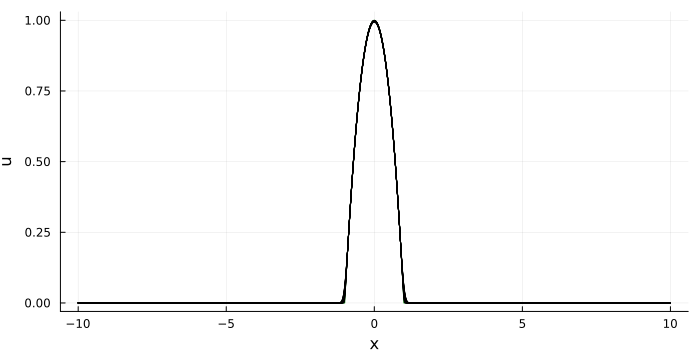

In [26]:
using LinearAlgebra, Plots

# Parameters
L = 10.0                               # domain half size - taille de l'intervalle valeur positives [-L,L]
Nx = 1600                              # grid size (space) - nombre de points de la grille

Δx = 0.001                          # step size (space)
σ = 0.1                                # CFL - alpha 
#Δt = σ * Δx^2                          # step size (time) 
Δt = 0.0000001

Nt = 200                               # grid size (time)
x = range(-L, L, length=Nx+1)          # grid (space) - linspace de -L à L
u0 = max.(0, 1 .- x.^2)                # initial condition - condition initiale

# Explicit scheme
u = u0 # Attention u_0 = une fonction évaluée aux points du maillage 
u_plot = plot(x, u, xlabel="x", ylabel="u", color=:green, legend=false)

θ = 0.5
A = Tridiagonal(σ*(-1+θ)*ones(Nx), 1 .+2*(1-θ)*σ*ones(Nx+1),σ*(-1+θ)*ones(Nx))
B = Tridiagonal(σ*θ*ones(Nx) ,1 .- 2*θ*σ*ones(Nx+1), σ*θ*ones(Nx))

for n = 1:Nt    # boucle en temps
    u = A\B*u 
    if mod(n, Nt/20) == 0 # affichage tous les 20 pas de temps (moins long)
        plot!(u_plot, x, u, xlabel="x", ylabel="u", color=:black, legend=false)
    end
end
display(plot(u_plot, size=(700, 350))) # Phénomène de diffusion

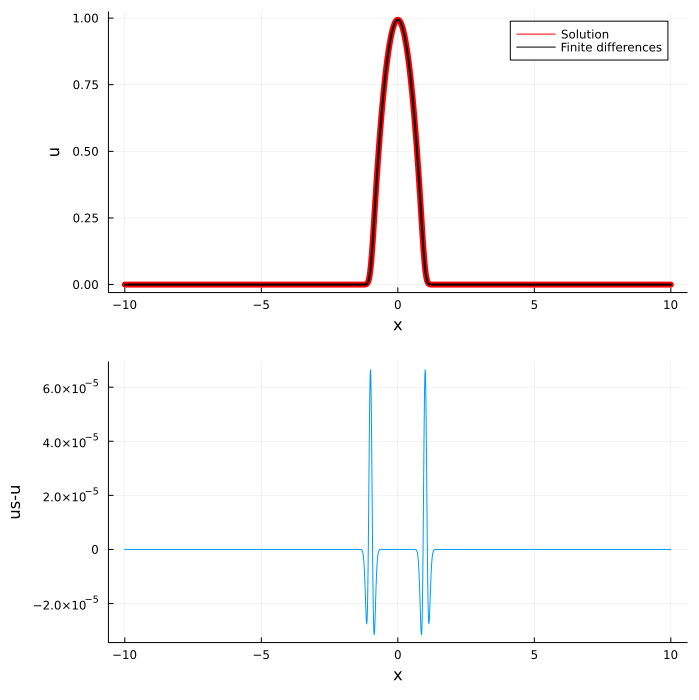

Δx: 0.001	 Δt:1.0e-7	 max error: 6.643058996960022e-5


In [27]:
# Comparison with exact solution (computed convoluting with Gaussian kernel)
# Construction solution exacte - convolution avec une gaussienne
us = zeros(Nx+1)
ker = exp.( -((0:Nx)*Δx).^2 / (4*Nt*Δt) )
kmax = findall(x -> x < 1e-14, ker)
kmax = length(kmax) > 0 ? kmax[1] : error("Increase Nx")

for j = 1:(Nx+1) 
    jmin = max(1, j-kmax)
    jmax = min(Nx+1, j+kmax)
    us[j] = Δx * sum( u0[jmin:jmax].*ker[1 .+ abs.(j.-(jmin:jmax))] ) / sqrt(4*π*Nt*Δt)
end

err = us-u
us_plot = plot(x, us, xlabel="x", ylabel="us", color=:red, label="Solution", lw=6)
plot!(us_plot, x, u, xlabel="x", ylabel="u", color=:black, label="Finite differences", lw=2)
err_plot = plot(x, err, xlabel="x", ylabel="us-u", legend=false)
display(plot(us_plot, err_plot, layout=(2, 1), size=(700, 700)))
println("Δx: ", Δx, "\t Δt:", Δt, "\t max error: ", maximum(abs.(err)))

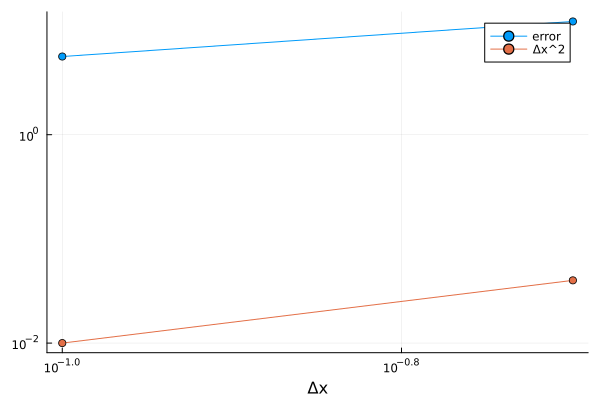

In [28]:
# Precision test
#on fixe θ et on étudie  la précision en espace
#theta = 0.1 < 1/2
Δx = [0.2,0.1]
errx = [12.221402715286123,5.631044853804073]
plot(Δx, errx, xaxis=:log, yaxis=:log, marker=:dot, xlabel="Δx", label="error")
plot!(Δx, Δx.^2, xaxis=:log, yaxis=:log, marker=:dot, xlabel="Δx", label="Δx^2")

$$ u_j^{n+1} - (1 - \theta).\frac{\Delta t}{\Delta x^2}.(u_{j+1}^{n+1}-2u_j^{n+1}+u_{j-1}^{n+1}) = u_j^{n} + \theta.\frac{\Delta t}{\Delta x^2}.(u_{j+1}^n-2u_j^n+u_{j-1}^n) $$

On posera $\alpha = \frac{\Delta t}{\Delta x^2}$


D'où :

$$ u_{j+1}^{n+1}.\alpha.(-1 + \theta) + u_{j}^{n+1}.(1 + 2.(1 - \theta).\alpha) + u_{j-1}^{n+1}.\alpha.(-1 + \theta) = u_{j+1}^{n}.\alpha.\theta + u_{j}^{n}.(1 - 2.\alpha.\theta) + u_{j-1}^{n}.\alpha.\theta $$

Et nos matrices seront :
$$ A = \begin{pmatrix}
1 + 2.(1 - \theta).\alpha & \alpha.(-1 + \theta) & 0 & 0 & 0 & \ldots & 0\\
\alpha.(-1 + \theta) & 1 + 2.(1 - \theta).\alpha & \alpha.(-1 + \theta) & 0 &\ddots & \ddots & \vdots \\
0 & \alpha.(-1 + \theta) & 1 + 2.(1 - \theta).\alpha & \alpha.(-1 + \theta) & \ddots & \ddots & \vdots \\
\vdots & \ddots & \ddots & \ddots & \ddots & \ddots & \vdots\\
\vdots & \ddots & \ddots & \ddots & \ddots &  \ddots & 0  \\
\vdots & \ddots & \ddots & \ddots & \ddots & \ddots & \alpha.(-1 + \theta) \\
0 & \ldots & \ldots & \ldots & 0 & \alpha.(-1 + \theta) & 1 + 2.(1 - \theta).\alpha \\
\end{pmatrix} $$

$$ B = \begin{pmatrix}
1 - 2.\alpha.\theta & \alpha.\theta & 0 & 0 & 0 & \ldots & 0\\
\alpha.\theta & 1 - 2.\alpha.\theta & \alpha.\theta & 0 &\ddots & \ddots & \vdots \\
0 & \alpha.\theta & 1 - 2.\alpha.\theta & \alpha.\theta & \ddots & \ddots & \vdots \\
\vdots & \ddots & \ddots & \ddots & \ddots & \ddots & \vdots\\
\vdots & \ddots & \ddots & \ddots & \ddots &  \ddots & 0  \\
\vdots & \ddots & \ddots & \ddots & \ddots & \ddots & \alpha.\theta \\
0 & \ldots & \ldots & \ldots & 0 & \alpha.\theta & 1 - 2.\alpha.\theta \\
\end{pmatrix} $$

Tels que :
$$ A.U^{n+1} = B.U^n $$

```
θ = 0.5
A = Tridiagonal(σ*(-1+θ)*ones(Nx), 1 .+2*(1-θ)*σ*ones(Nx+1),σ*(-1+θ)*ones(Nx))
B = Tridiagonal(σ*θ*ones(Nx) ,1 .- 2*θ*σ*ones(Nx+1), σ*θ*ones(Nx))
```